#  LSTM — Predicción Next-Step en Serie Sintética

1) Serie sintética y ventanas

In [1]:
# configuración para importar módulos del proyecto - agrega la carpeta raíz al path
import sys, os
sys.path.append(os.path.abspath(".."))  

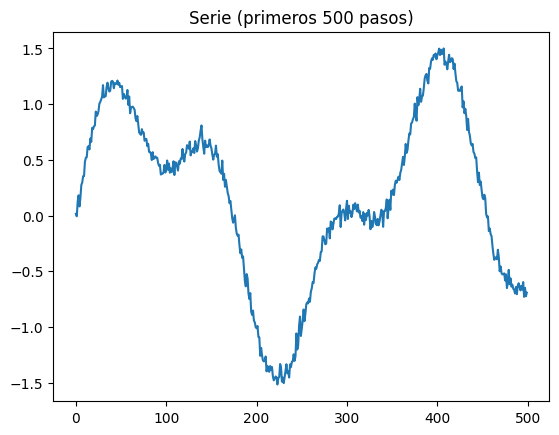

((1974, 32, 1), (494, 32, 1))

In [2]:
from src.data import make_sine_series
from src.utils import make_windows, plot_history
from src.models import build_lstm
import numpy as np, matplotlib.pyplot as plt

series = make_sine_series(n_steps=2500, noise=0.05)
plt.plot(series[:500]); plt.title("Serie (primeros 500 pasos)"); plt.show()

X, y = make_windows(series, window=32)
n = int(0.8*len(X))
X_tr, y_tr = X[:n], y[:n]
X_val, y_val = X[n:], y[n:]
X_tr.shape, X_val.shape


2) Modelo y entrenamiento

Epoch 1/10
31/31 - 3s - 87ms/step - loss: 0.1321 - val_loss: 0.0456
Epoch 2/10
31/31 - 1s - 16ms/step - loss: 0.0234 - val_loss: 0.0129
Epoch 3/10
31/31 - 0s - 16ms/step - loss: 0.0079 - val_loss: 0.0059
Epoch 4/10
31/31 - 0s - 16ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 5/10
31/31 - 0s - 16ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 6/10
31/31 - 0s - 16ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 7/10
31/31 - 0s - 16ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/10
31/31 - 0s - 16ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 9/10
31/31 - 0s - 16ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 10/10
31/31 - 0s - 16ms/step - loss: 0.0040 - val_loss: 0.0040


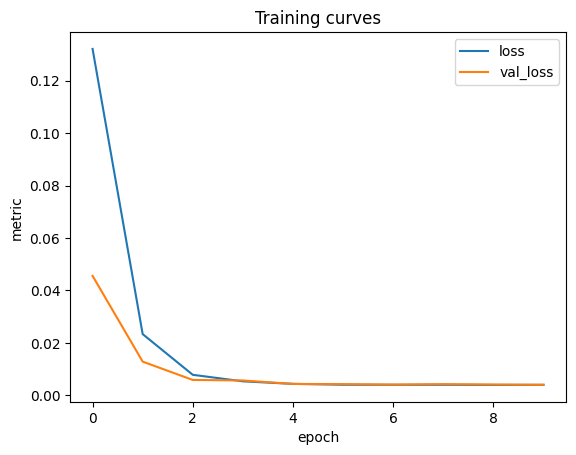

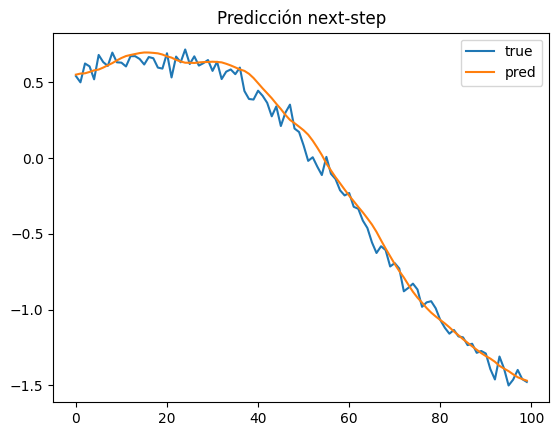

In [3]:
model = build_lstm(input_timesteps=32, features=1)
hist = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=2)
plot_history(hist)

# Predicción a un paso
pred = model.predict(X_val[:100], verbose=0).ravel()
true = y_val[:100].ravel()
plt.plot(true, label="true"); plt.plot(pred, label="pred"); plt.legend(); plt.title("Predicción next-step"); plt.show()


3) Curvas y resumen

In [4]:
from src.metrics import save_history_curves, count_params
from src.utils import append_summary_row, now_ts
import numpy as np, os, time

os.makedirs("../results/lstm", exist_ok=True)
save_history_curves(hist, "../results/lstm/learning_curves.png")

val_loss = hist.history.get("val_loss", [None])[-1]
append_summary_row("../results/summary.csv", {
    "timestamp": now_ts(),
    "module": "lstm",
    "model": "StackedLSTM",
    "dataset": "sine_synthetic",
    "accuracy": "",
    "f1": "",
    "loss": float(val_loss) if val_loss is not None else "",
    "epochs": len(hist.history.get("loss", [])),
    "params": int(model.count_params()),
    "train_time_s": "",
    "notes": "next-step mse (val)"
})
print("Resumen agregado a results/summary.csv")


Resumen agregado a results/summary.csv
